Hi Ekta. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1 <a class="tocSkip">

Thank you so much for submitting your project! I can see that you've worked really hard on it! Unfortunately, your project is not quite ready for review. This is because the path to the file is wrong. I believe you can easily fix it!
    
    
Dear Svetlana, thanks so much for your time and effort. I tried to fix the problem. Hope it is working now. 
Regards
   Ekta
    
## Review v. 2 <a class="tocSkip">
    
Thanks for sending in your project with corrections. It's clear you've put a lot of effort into it. I'm really glad to see that the part regarding statistical tests is much improved! However, this other part data analysis needs a bit more work. Could you take a second glance at it? One more time and you'll have it!
    
## Review v. 3 <a class="tocSkip">
    
Your corrections look great, you've improved your work significantly! Your project has been accepted! Keep at it. You're improving every day!

Table of contents

* Introduction <a href="#Introduction">Goal of the project</a>
* Step1 Opening datasets<a href="#Step1 Opening datasets">Opening datasets and studying the information</a>
* Summary datasets<a href="#Summary datasets">Summary of all datasets</a>
* Step2 Data preparation - error elimination <a href= "#Step2 Preparing the data">Datatype conversion and error elimination, calculating the quantity total for each variable, and the monthly revenue for each customer</a>
* Summary Data preparation - error elimination <a href= "#Summary for preparing the data">Summary Data preparation</a>
* Step3 Creating new dataframe for analysis <a href= "#Step3 Creating new dataframe for analysis">Create new dataframe with variables of interest to understand customer bevaiour and plotting frequency distribution </a>
* Summary data analysis for variables of interest <a href= "#Summary data analysis for variables of interest">Calculation of monthly revenue for each user</a>
* Step4 Testing the hypothesis <a href= "#Hypothesis testing"> Hypothesis testing </a>
* Summary Hypothesis testing <a href= "#Summary Hypothesis testing"> Hypothesis testing </a>
* Step5 Overall conclusion <a href= "#Final conclusion"> Final conclusion</a>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It’s great that you added a table of contents with links, but it will be nice to add a goal of the project.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you described a goal of the project.
</div>

### Introduction 
- Goal of the project:
    1. To analyse telecom operator Megaline's customers' behaviour. 
    2. Determine which prepaid plan brings in more revenue.
    
<a name="#Introduction">Goal of the project</a>

### Step1 Opening dataset
<a name="Step1 Opening datasets">Opening datasets and studying the information</a>    

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add a correct path to the file :) Please see instructions if necessary.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now it's correct :)
</div>

In [1]:
#importing the necessary directories
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
from scipy import stats as st
from scipy.stats import norm
from functools import reduce

#opening the csv file 

calls = pd.read_csv('/datasets/megaline_calls.csv')
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [2]:
# Checking for duplicates
calls[calls.duplicated(keep = False)]

,id,user_id,call_date,duration


In [3]:
# Checking for missing values
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [4]:
# Checking how many unique 'user_id' out of the 500 are present in this dataset
#setting normalize=True
item_counts = calls["user_id"].value_counts(normalize=True)
item_counts.count()


481

### Findings csv file with details on calls
1. Total of 137735 records.
2. Each record gives details about the call duration and call date a user made
3. There are no duplicate values detected
4. There are no missing values in the calls dataframe
5. As against data for all 500 megaline clients call dataframe has data only for 481 users

In [5]:
#opening csv file 

try:
    internet = pd.read_csv("C:/Datasets/megaline_internet.csv")
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's a good idea to use try-except for the path to the file.
</div>

In [6]:
internet[internet.duplicated(keep = False)]

,id,user_id,session_date,mb_used


In [7]:
#checking for missing values 
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [8]:
# Checking how many unique 'user_id' out of the 500 are present in this dataset
#setting normalize=True
item_counts = internet["user_id"].value_counts(normalize=True)
item_counts.count()

489

### Findings csv file with details on internet usage
1. Total of 104825 records.
2. Each record gives details about the volume of data consumed in mb  and the session date the user used the internet
3. There are no duplicate values detected
4. There are no missing values in the dataframe
5. From the 500 client data data for internet usage is availabe for only 489 clients

In [9]:
#opening csv file 

try:
    messages = pd.read_csv("C:/Datasets/megaline_messages.csv")
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [10]:
#checking for duplicate values
messages[messages.duplicated(keep = False)]

,id,user_id,message_date


In [11]:
#checking for missing values 
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [12]:
# Checking how many unique 'user_id' out of the 500 are present in this dataset
#setting normalize=True
item_counts = messages["user_id"].value_counts(normalize=True)
item_counts.count()

402

### Findings csv file with details on messages
1. Total of 76051 records.
2. Each record gives details about the volume of data consumed in mb  and the session date the user used the internet
3. There are no duplicate values detected
4. There are no missing values in the dataframe
5. As against universe data for all 500 megaline clients messages dataframe has data only for 402 users

In [13]:
#opening csv file 
plan_name = pd.read_csv('/datasets/megaline_plans.csv')
plan_name

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
#opening csv file 
users = pd.read_csv('/datasets/megaline_users.csv')
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [15]:
#checking for duplicate values
users[users.duplicated(keep = False)]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [16]:
#checking for missing values
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [17]:
# Checking how many unique 'user_id' out of the 500 are present in this dataset
#setting normalize=True
item_counts = users["user_id"].value_counts(normalize=True)
item_counts.count()

500

### Findings csv file with details on users
1. Total of 500 users data records.
2. Each record gives details about the different users , their names, age, cities , when they registered , what plan they use, date the user stopped using the servce. 
3. There are no duplicate values detected
4. There are missing values in the column churn dates, all people who are still using the service have no values in the churn date column

### Summary datasets findings 
1. The user dataset captures details of 500 users with their persoanl infomration, when the customer registered and whether the customer is still a customer or not. 
2. There are no missing values or duplicate values it the datasets
3. Each row in the dataset contains the details for eac customer. 
<a name="Summary datasets">Summary of all datasets</a>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded and ready for the further analysis.
</div>

## Step2. Data preparation
<a name= "Step2 Preparing the data">Datatype conversion and error elimination, calculating the quantity total for each variable, and the monthly revenue for each customer</a>

#### Identifying variable types

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The call_date, seesion_date, message_date, reg_date and churn_date are of object datatype, however these variables give us information about the date, montha and year and therefore it should be converted to datetime datatype

#### Changing data types based on variable types

In [22]:
# Changing the column containing date from object type to datetime type
calls["call_date"] = pd.to_datetime(calls["call_date"], format='%Y-%m-%d')
internet["session_date"] = pd.to_datetime(internet["session_date"], format='%Y-%m-%d')
messages["message_date"] = pd.to_datetime(messages["message_date"], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you brought the data to the desired formats.
</div>

##### Adding a column of month using DatetimeIndex

In [23]:
#extracting month from using DateTimeindex
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
calls['month'] = pd.DatetimeIndex(calls['call_date']).month


##### Grouping data to create a new Dataframe with the variables of interest

In [24]:
##Group by columns "user_id" and "month" and aggregating the duration and call date columns
grouped_calls = calls.groupby(["user_id", 'month']).agg({'duration': ['sum'], 'call_date': ['count']})
grouped_calls.reset_index()

,user_id,month,duration,call_date
,,,sum,count
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53


In [25]:
##Group by columns "user_id" and "month" and aggregating the total usage in mb
grouped_internet = internet.groupby(["user_id", "month"]).agg({'mb_used': ['sum']})
grouped_internet.reset_index()

,user_id,month,mb_used
,,,sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43


In [26]:
##Group by columns "user_id" and "month" and aggregating the message date
grouped_messages = messages.groupby(["user_id", "month"]).agg({'message_date': ['count']})
grouped_messages.reset_index()

,user_id,month,message_date
,,,count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13


### Merging the tables to form one dataframe with all variables of interest 

In [27]:
data_frames = [grouped_calls, grouped_internet, grouped_messages]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames).fillna(0)

In [28]:
df_merged.reset_index()

,user_id,month,duration,call_date,mb_used,message_date
,,,sum,count,sum,count
0,1000,12,116.83,16.0,1901.47,11.0
1,1001,8,171.14,27.0,6919.15,30.0
2,1001,9,297.69,49.0,13314.82,44.0
3,1001,10,374.11,65.0,22330.49,53.0
4,1001,11,404.59,64.0,18504.30,36.0
...,...,...,...,...,...,...
2288,1349,10,0.00,0.0,13093.55,76.0
2289,1349,11,0.00,0.0,17128.26,72.0
2290,1349,12,0.00,0.0,13039.91,61.0


#### For each user the following parameters are calculated:
1. Number of calls and total minutes used per month as total_calls and monthly_minutes respectively
2. Number of texts sent per month as total_messages
3. Volume of data in GB used per month as data 

In [29]:
df1 = df_merged.reset_index()
df1

,user_id,month,duration,call_date,mb_used,message_date
,,,sum,count,sum,count
0,1000,12,116.83,16.0,1901.47,11.0
1,1001,8,171.14,27.0,6919.15,30.0
2,1001,9,297.69,49.0,13314.82,44.0
3,1001,10,374.11,65.0,22330.49,53.0
4,1001,11,404.59,64.0,18504.30,36.0
...,...,...,...,...,...,...
2288,1349,10,0.00,0.0,13093.55,76.0
2289,1349,11,0.00,0.0,17128.26,72.0
2290,1349,12,0.00,0.0,13039.91,61.0


In [30]:
df1.columns = ['user_id', 'month', 'total_minutes', 'total_calls', 'total_data', 'total_messages']

#### To calculate the revenue from each user :
1. I am merging the above datarfame with the 'users' dataframe  at 'user id'
2. I will be calculating the revenue by defining a function to arrive at the total revenue for each user per plan

In [31]:
df_final = pd.merge(left=df1, right= users, left_on='user_id', right_on='user_id' )
df_final

,user_id,month,total_minutes,total_calls,total_data,total_messages,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,116.83,16.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8,171.14,27.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9,297.69,49.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10,374.11,65.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11,404.59,64.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.00,0.0,21346.95,42.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT
2289,1204,12,0.00,0.0,36730.05,78.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT
2290,1349,10,0.00,0.0,13093.55,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT
2291,1349,11,0.00,0.0,17128.26,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT


In [32]:
#changing datatype as per the variable type
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month

In [33]:
#Explicit type conversion from float to int
#df['total_calls'] = df['total_calls'].astype(int)
#df['monthly_minutes']  = df['monthly_minutes'].astype(int)

#Round off the values according to the plan description
1. Rounding the numbers of minutes to the nearest cieling value
2. Rounding up the total monthly internet usage to nearest gigbytes

In [34]:
#Calls are rounded off
df_final['total_minutes'] = df_final['total_minutes'].apply(np.ceil)

In [35]:
# Total of month data usage converted to GB and then rounded off
df_final['total_data'] = (df_final['total_data']/1024).apply(np.ceil)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's correct that you have used .ceil to round up data.
</div>

In [36]:
df_final['churn_date'] = df_final['churn_date'].fillna('NA')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this links will be interesting for you: https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object 

</div>

To calculate the revenue per plan I will be defining a new function based on the following parameters for each plan 
Megaline plan description:
1. Plan surf 
Basic :
* Monthly charge = $20
* monthly minutes = 500
* Messages = 50
* internet_usage = 15 GB
Additional:
* 1 minutes = $0.03 
* 1 text message = $0.03 
* 1 GB data = $10

2. Ulitmate
Basic:
* Monthly charge = $70
monthly minutes = 3000
messages = 1000
internet usage = 30 GB
Addition:
I minute = $0.01 
1 Text message = $0.01
1 GB data = $7


In [37]:
# Defining a function to calculate the total revenue from the plan Surf
def total_revenue_surf(row): 
    messages = row['total_messages']
    monthly_minutes = row['total_minutes']
    internet_usage = row['total_data']

    
    "    #now let's find the revenue for user using our parameter monthly minuutes. We will create new variable revenue_surf.\n",
  
    if monthly_minutes >= 500:
        revenue_calls = (0.03)*(monthly_minutes - 500)      
    else:
        revenue_calls = 0
        
    "    # let's find the revenue from texts \n"
    if messages >= 50:
        revenue_messages = 0.03*(messages - 50)
    else :
        revenue_messages = 0
    "   # let's find the revenue from internet_usage\n"
       
    if internet_usage >= 15:
        revenue_internet_usage = 10*(internet_usage - 15)
    else :
        revenue_internet_usage = 0
       
    "    #now calculate the total revenue by simply summing it all up\n"
    total_revenue_surf = 20 + revenue_calls + revenue_messages + revenue_internet_usage
    return total_revenue_surf

In [38]:
# Defining a function to calculate the total revenue from the plan Surf
def total_revenue_ultimate(row): 
    messages = row['total_messages']
    monthly_minutes = row['total_minutes']
    internet_usage = row['total_data']
    
    "    #now let's find the revenue for user using our parameter monthly minuutes. We will create new variable revenue_surf.\n",
    if monthly_minutes >= 3000:
        revenue_calls = (0.01)*(monthly_minutes - 3000)      
    else:
        revenue_calls = 0
        
    "    # let's find the revenue from texts \n"
    if messages >= 1000:
        revenue_messages = (0.01)*(messages - 1000)
    else :
        revenue_messages = 0
    "   # let's find the revenue from internet_usage\n"
       
    if internet_usage >= 30:
        revenue_internet_usage = (7)*(internet_usage - 30)
    else :
        revenue_internet_usage = 0
       
    "    #now calculate the total revenue by simply summing it all up\n"
    total_revenue_ultimate = 70 + revenue_calls + revenue_messages + revenue_internet_usage
    return total_revenue_ultimate

In [39]:
#Applying the new finction to the table filtered by the tariff at surf
df_final['total_revenue_surf'] = df_final.query('plan == "surf"').apply(total_revenue_surf, axis = 1)

In [40]:
#Applying the new finction to the table filtered by the tariff at ultimate
df_final['total_revenue_ultimate'] = df_final.query('plan == "ultimate"').apply(total_revenue_ultimate, axis = 1)

In [41]:
#Monthly revenue from each user
df_final.describe()

,user_id,month,total_minutes,total_calls,total_data,total_messages,age,total_revenue_surf,total_revenue_ultimate
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,1573.000000,720.000000
mean,1246.075883,9.172700,405.708242,60.067597,16.870475,33.166594,45.428260,60.331933,72.313889
std,143.051927,2.496386,223.404711,32.402563,7.796174,34.070085,16.764349,55.263890,11.395108
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000,70.000000
25%,1122.000000,8.000000,250.000000,38.000000,12.000000,3.000000,30.000000,20.000000,70.000000
50%,1245.000000,10.000000,401.000000,60.000000,17.000000,26.000000,46.000000,40.150000,70.000000
75%,1368.000000,11.000000,541.000000,79.000000,21.000000,51.000000,61.000000,80.000000,70.000000
max,1499.000000,12.000000,1432.000000,205.000000,70.000000,266.000000,75.000000,588.660000,182.000000


#### Summary Data preparation
1. The datatypes were changed based on the type of variables for calls date, session date, message date, reg date and churn date from object data type to datetime datytypes
2. Using the datatime datatype the months were extracted for call, internet and message dataframes.
3. After extracting the month the dataframes with the desired variables of calls duration, messages and data were grouped together on user id and months to get one datafrmae. 
4. Thereafter as per the plan specifications the callminutes and data usage were rounded off since the service provider rounds up the minutes used and data consumed and then charges the customer.
5. Based ont he specification of the plan 2 functions were defined to calculate the revenue from Surf plan adn Ultimate plan. 
6. These functions were applied to filtered data to calculate the revenue per month for each plan 

<a name= "Summary for preparing the data">Summary Data preparation</a>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, lets move to the data analysis.
</div>

### Step 3. Analysis of data <a name= "Step3 Creating new dataframe for analysis">Create new dataframe with variables of interest to understand customer bevaiour and plotting frequency distribution </a>

In [42]:
#Renaming the data columns to reflect the contents of the column
df_final.columns = ['user_id', 'month', 'minutes', 'calls', 'data', 'total_messages','first_name', 'last_name', 'age', 'city','reg_date','tariff','churn_date','total_revenue_surf','total_revenue_ultimate' ]

In [43]:
customer_behaviour_surf = pd.pivot_table(data=df_final.query('tariff =="surf"'), index=['month'], values=['minutes','total_messages', 'data'], aggfunc=('mean'), fill_value=0).reset_index().rename(columns={'minutes': 'avg_min_surf', 'data': 'avg_data_surf','total_messages': 'avg_msgs_surf' })
customer_behaviour_surf

,month,avg_data_surf,avg_min_surf,avg_msgs_surf
0,1,5.000000,193.000000,10.500000
1,2,12.222222,281.333333,12.000000
2,3,13.565217,311.434783,15.260870
3,4,12.220000,332.920000,17.400000
4,5,14.116883,377.532468,24.012987
5,6,15.484536,407.690722,25.298969
6,7,16.876033,425.000000,27.033058
7,8,16.882716,387.660494,28.777778
8,9,16.690722,391.453608,30.762887
9,10,17.409283,406.202532,33.839662


In [44]:
# Calculating the minutes , texts, and volume of data that the current customers are consumng each month forplan Surf
customer_behaviour_surf = pd.pivot_table(data=df_final.query('tariff =="surf"'), index=[ 'user_id','month'], values=['minutes','total_messages', 'data'], aggfunc=('mean'), fill_value=0).rename(columns={'minutes': 'avg_min_surf', 'data': 'avg_data_surf','total_messages': 'avg_msgs_surf' })
customer_behaviour_surf

avg_data_surf  avg_min_surf  avg_msgs_surf
user_id month                                            
1001    8                  7           172             30
        9                 14           298             44
        10                22           375             53
        11                19           405             36
        12                19           393             44
...                      ...           ...            ...
1498    12                23           325              0
1499    9                 13           331              0
        10                20           364              0
        11                17           289              0
        12                22           469              0

[1573 rows x 3 columns]

##### Calculating the descriptive statistic values  for the variables: Minutes, texts, and data for the plan Surf 

In [45]:
#Calculating the mean for data for plan Surf
data_surf_mean =df_final.query('tariff =="surf"')['data'].mean()
print('{:.2f}'.format(data_surf_mean))


16.67


In [46]:
data_surf_var =df_final.query('tariff =="surf"')['data'].var()
print('{:.2f}'.format(data_surf_var))

61.58


In [47]:
data_surf_std = np.sqrt(data_surf_var)
print('{:.2f}'.format(data_surf_std))

7.85


In [48]:
minutes_surf_mean = df_final.query('tariff =="surf"') ['minutes'].mean()
print('{:.2f}'.format(minutes_surf_mean))

405.25


In [49]:
minutes_surf_var = df_final.query('tariff =="surf"') ['minutes'].var()
print('{:.2f}'.format(minutes_surf_var))

49143.99


In [50]:
minutes_surf_std = np.sqrt(minutes_surf_var)
print('{:.2f}'.format(minutes_surf_std ))

221.68


In [51]:
total_messages_surf_mean =df_final.query('tariff =="surf"') ['total_messages'].mean()
print('{:.2f}'.format(total_messages_surf_mean ))

31.16


In [52]:
total_messages_surf_var =df_final.query('tariff =="surf"') ['total_messages'].var()
print('{:.2f}'.format(total_messages_surf_var))

1126.72


In [53]:
total_messages_surf_std = np.sqrt(total_messages_surf_var )
print('{:.2f}'.format(total_messages_surf_std))

33.57


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done for using .format().
</div>

Findings: 
1. On an average the usage of data, messages and duration of calls are increasing as we move from January to December
2. It might be a function of more consumers getting added to the database. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's interesing findings :)
</div>

 #### Calculating the descriptive statistic values  for the variables: Minutes, texts, and data for the plan Ultimate

In [54]:
customer_behaviour_ultimate = pd.pivot_table(data=df_final.query('tariff =="ultimate"'), index=['month'], values=['minutes','total_messages', 'data'], aggfunc=('mean'), fill_value=0).rename(columns={'minutes': 'avg_min_ultimate', 'data': 'avg_data_ultimate','total_messages': 'avg_msgs_ultimate' })
customer_behaviour_ultimate

,avg_data_ultimate,avg_min_ultimate,avg_msgs_ultimate
month,,,
1,7.250000,183.750000,15.500000
2,17.285714,380.428571,21.571429
3,18.416667,286.166667,20.250000
4,16.333333,317.095238,22.047619
5,16.862069,384.206897,32.103448
6,15.425532,350.361702,29.340426
7,16.491525,404.271186,32.830508
8,17.845070,397.788732,38.478873
9,17.011628,413.779070,37.895349


In [55]:
# #Calculating the mean for data for plan Ultimate
customer_behaviour_ultimate = pd.pivot_table(data=df_final.query('tariff =="ultimate"'), index=['user_id', 'month'], values=['minutes','total_messages', 'data'], aggfunc=('mean'), fill_value=0).rename(columns={'minutes': 'avg_min_ultimate', 'data': 'avg_data_ultimate','total_messages': 'avg_msgs_ultimate' })
customer_behaviour_ultimate

avg_data_ultimate  avg_min_ultimate  avg_msgs_ultimate
user_id month                                                        
1000    12                     2               117                 11
1006    11                     3                10                 15
        12                    32                55                139
1008    10                    17               451                 21
        11                    24               423                 37
...                          ...               ...                ...
1493    9                     15               506                  0
        10                    16               425                  0
        11                    16               473                  0
        12                    15               447                  0
1497    12                    11               277                 50

[720 rows x 3 columns]

In [56]:
data_ultimate_mean =df_final.query('tariff =="ultimate"')['data'].mean()
print('{:.2f}'.format(data_ultimate_mean))

17.31


In [57]:
data_ultimate_var =df_final.query('tariff =="ultimate"')['data'].var()
print('{:.2f}'.format(data_ultimate_var))

58.83


In [58]:
data_ultimate_std = np.sqrt(data_ultimate_var)
print('{:.2f}'.format(data_ultimate_std))

7.67


In [59]:
minutes_ultimate_mean = df_final.query('tariff =="ultimate"')['minutes'].mean()
print('{:.2f}'.format(minutes_ultimate_mean))

406.71


In [60]:
minutes_ultimate_var = df_final.query('tariff =="ultimate"')['minutes'].var()
print('{:.2f}'.format(minutes_ultimate_var))

51651.66


In [61]:
minutes_ultimate_std = np.sqrt(minutes_ultimate_var)
print('{:.2f}'.format(minutes_ultimate_std))

227.27


In [62]:
total_messages_ultimate_mean =df_final.query('tariff =="ultimate"')['total_messages'].mean()
print('{:.2f}'.format(total_messages_ultimate_mean))

37.55


In [63]:
total_messages_ultimate_var =df_final.query('tariff =="ultimate"')['total_messages'].var()
print('{:.2f}'.format(total_messages_ultimate_var))

1208.76


In [64]:
total_messages_ultimate_std = np.sqrt(total_messages_ultimate_var )
print('{:.2f}'.format(total_messages_ultimate_std))

34.77


Findings:
1. On an average the usage of data, messages and duration of calls are increasing as we move from January to December
2. It might be a function of more consumers getting added to the database.  
3. Averages for these variables are comparable for both which is slightly higher for Surf than Ultimate

<div class="alert alert-danger" role="alert">
"Outlier detection and deletion"
</div>


In [65]:

#Identifying outliers using IQR method for plan Ultimate
Q1_ultimate = customer_behaviour_ultimate.quantile(0.25)
Q3_ultimate = customer_behaviour_ultimate.quantile(0.75)
IQR_ultimate = Q3_ultimate - Q1_ultimate
IQR_ultimate


avg_data_ultimate      8.0
avg_min_ultimate     285.5
avg_msgs_ultimate     54.0
dtype: float64

In [66]:
#Removing the outliers 
customer_behaviour_ultimate_out = customer_behaviour_ultimate[~((customer_behaviour_ultimate < (Q1_ultimate - 1.5 * IQR_ultimate)) |(customer_behaviour_ultimate > (Q3_ultimate + 1.5 * IQR_ultimate))).any(axis=1)]
customer_behaviour_ultimate_out

avg_data_ultimate  avg_min_ultimate  avg_msgs_ultimate
user_id month                                                        
1000    12                     2               117                 11
1006    11                     3                10                 15
        12                    32                55                139
1008    10                    17               451                 21
        11                    24               423                 37
...                          ...               ...                ...
1493    9                     15               506                  0
        10                    16               425                  0
        11                    16               473                  0
        12                    15               447                  0
1497    12                    11               277                 50

[666 rows x 3 columns]

54 rows were removed as a result of outliers

In [67]:
#Identifying outliers using IQR method
Q1_surf = customer_behaviour_surf.quantile(0.25)
Q3_surf = customer_behaviour_surf.quantile(0.75)
IQR_surf = Q3_surf - Q1_surf
IQR_surf

avg_data_surf      9.0
avg_min_surf     288.0
avg_msgs_surf     44.0
dtype: float64

In [68]:
# Removing the outliers for each column for plan Ultimate
customer_behaviour_surf_out = customer_behaviour_surf[~((customer_behaviour_surf < (Q1_surf - 1.5 * IQR_surf)) |(customer_behaviour_surf > (Q3_surf + 1.5 * IQR_surf))).any(axis=1)]
customer_behaviour_surf_out

avg_data_surf  avg_min_surf  avg_msgs_surf
user_id month                                            
1001    8                  7           172             30
        9                 14           298             44
        10                22           375             53
        11                19           405             36
        12                19           393             44
...                      ...           ...            ...
1498    12                23           325              0
1499    9                 13           331              0
        10                20           364              0
        11                17           289              0
        12                22           469              0

[1475 rows x 3 columns]

Outlier study : A total of 98 rows were deleted as a result of outliers

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Well done that you analysed and removed an outliers.
</div>

##### Frequency distribution for the minutes, text and volume of data for both plans after removing the outliers

In [69]:
### Frequency distribution for minutes for both plans after removing outliers
x1 = customer_behaviour_surf_out ['avg_min_surf']['month']
x2 = customer_behaviour_ultimate_out['avg_min_ultimate']['month']

kwargs = dict(alpha=0.5,density=True, stacked=True)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='salmon', label='Surf')
plt.hist(x2, **kwargs, color='lightblue', label='Ultimate')

#plt.gca().set(title='Distribution for monthly_minutes', xlabel = 'avg_minutes', ylabel='Probability')
#plt.legend();

KeyError: 'month'

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
An excellent graph, but please add the x axis label. Please note that this applies to all other graphs too.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:

Well done that you fixed graphs.
</div>

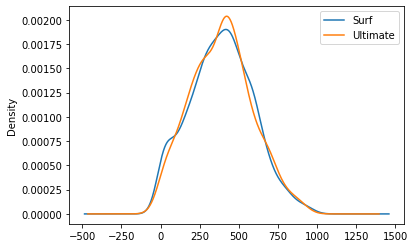

In [70]:
customer_behaviour_surf_out ['avg_min_surf'].plot(kind = 'density', label = 'Surf')
customer_behaviour_ultimate_out['avg_min_ultimate'].plot(kind = 'density', label = 'Ultimate')   
plt.legend()
plt.show()

Findings of graph:
1. Unimodal data with approximate normal distribution
2. Range of the data for minutes in  surf plan  is 0-1432 and that for ultimate plan 0 to 1293
3. Center of the data is somewhere between 400-405 for both the variables. 
4. The standard deviation a measure of dispersion  for surf plan is 221 and that for ultimate is 227, showing that the data has a close dispersion. And the data points are not that widespread from the mean 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you analyzed the graph in details.
</div>

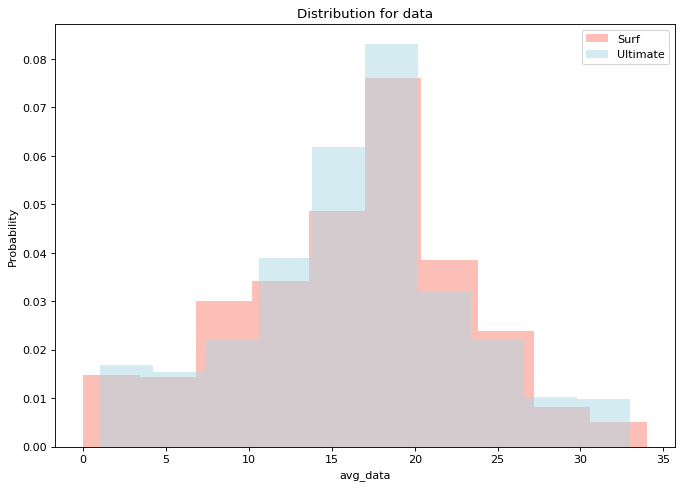

In [71]:
x1 = customer_behaviour_surf_out ['avg_data_surf']
x2 = customer_behaviour_ultimate_out['avg_data_ultimate']

kwargs = dict(alpha=0.5,density=True, stacked=True)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='salmon', label='Surf')
plt.hist(x2, **kwargs, color='lightblue', label='Ultimate')

plt.gca().set(title='Distribution for data', xlabel = 'avg_data', ylabel='Probability')
plt.legend();

In [1]:
x1.plot(kind = 'density', label = 'Surf')
x2.plot(kind = 'density', label = 'Ultimate')  
plt.legend()
plt.show()

NameError: name 'x1' is not defined

### Findings:
1. After removing the outliers the surf customers average data usage ranges from 0 to 34 gigabytes, whereas the usage of ultimate customers ranges from 3 to 33 gigbytes. 
2. Unimodal data with approximate normal distribution, with the peak for both the plans seen at somewhere between 17 to 20 
3. The standard deviation a measure of dispersion  for surf plan is 8 and that for ultimate is 7.9, the dispersion is close dispersion.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done tat you anslysed graph in details and described the type of distribution.
    
Please see additional link: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

In [ ]:
x1 = customer_behaviour_surf_out ['avg_msgs_surf']['month']
x2 = customer_behaviour_ultimate_out['avg_msgs_ultimate']['month']


kwargs = dict(alpha=0.5,density=True, stacked=True)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='salmon', label='Surf')
plt.hist(x2, **kwargs, color='lightblue', label='Ultimate')

plt.gca().set(title='Distribution for total_messages',xlabel = 'Average_messages', ylabel='Probability')
plt.legend();

In [ ]:
x1.plot(kind = 'density', label = 'avg_msgs_surf')
x2.plot(kind = 'density', label = 'avg_msgs_ultimate')  
plt.legend()
plt.show()

### Findings:
1. Unimodal data , the data is right skewed showing that the mean is greater than the median 
2. After removing the outliers from both the plans, we can see that the range for plan ultimate is larger than plan surf. 
3. Plan ultimate the range is between 0 to 140 average messages, versus an average of 0 to 115 messages for plan ultimate
3. The standard deviation a measure of dispersion  for surf plan is 8 and that for ultimate is 7.9, the dispersion is close dispersion.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Could you please analyse an outliers and remove them?
    
Please see for details: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:

Ok, fixed.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Please plot histograms for calls, SMS and web traffic per month for both plans. 
</div>

I am not sure what is required here. Are the graphs that i have plotted not correct for this requirement.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 3:

I mean to plot n4mber of calls vs month and so on.
</div>

Conclusions:  
1. After removing the outliers the following observations can be made when we compare the plans:
    a. On an average the users of Ultimate plan consume more data and more call minutes as compared to Surf plan
    b. However in terms of average messages, the Surf plan users have a higher volume of messages as compared to the Ultimate plan 

### Step 4 : Test the hypotheses <a name= "Hypothesis testing"> Hypothesis testing </a>

##### Defining the nul hypothesis and alternate hypothesis
Null Hypothesis: There is no difference in the  average revenue from users of Ultimate and Surf tariff plans 
Alternate hypothesis: There is a difference in the average revenue from users of Ultimate adn Surf tariff plans
Since our alternative hypothesis is that the revenue are different we will be using two-tailed test to either reject the H= or fail to reject H0

###### Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have different variance

###### Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

###### I am using the t-test , because the methods of the scipy library make it normal automatically  and i am using 2 sided test since the null hypothesis states equality of data which means that the hypothesis can be rejected if the values are lower or higher than a critical value. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

Setting the critical statistic significance level alpha at 0.05.

In [ ]:

#  Student's t-test
from scipy.stats import ttest_ind
data1 = df_final.query('tariff =="surf"')['total_revenue_surf']
data2 = df_final.query('tariff =="ultimate"')['total_revenue_ultimate']

    
# Setting critical statistical signifance level alpha at 0.05
alpha = 0.05

# testing the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(
        data1, 
        data2, equal_var = False)

#print(np.var(data1))
#print(np.var(data2))
print('p-value:', results.pvalue )

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

In [1]:

from scipy.stats import mannwhitneyu

alpha = .05
results_mw = mannwhitneyu(data1, data2)
 
print('p-value: ', results_mw.pvalue)
if (results_mw.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


NameError: name 'data1' is not defined

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this link will be interesting for you: https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you right. We have a statistically significant differences in the average revenue from users of Ultimate and Surf plans.
</div>

In [ ]:
df_final['revenue'] = df_final['total_revenue_surf'].fillna(0) + df_final['total_revenue_ultimate'].fillna(0)

In [ ]:
# Paired Student's t-test
from scipy.stats import ttest_rel
data_1 = df_final[df_final['city'].str.contains('NY-NJ')]['revenue']
data_2 = df_final[~df_final['city'].str.contains('NY-NJ')]['revenue']
alpha = .05       # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis
#print(np.var(data_1))
#print(np.var(data_2))
results = st.ttest_ind(
        data_1, 
        data_2, equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please note that there is no a statistically significant differences in the average revenue from users in NY-NJ area and users from other regions.
    
I suppose that differences are due to data preparation (removing zero calls and so on).
</div>

Summary : 
1. I used the 2 sided T test to test the hypothesis that the 2 plans are different since it was an equality hpothesis, so the alternative can be either greater than or smaller than the mean. 
2. Since the p values were lesser than the significant value of 0.05, it means that the possibility that the null hypothesis is true is less than 5%. So we reject the null hypothesis. However for the second test the p value is close to the significant value. Therefore we fail to reject the null hypothesis.
3. Since the probabilities of the null hypothesis , stating that mean revenue from surf and ultimate plan are the same is too low, so we must reject it. 
<a name= "Sumamry Hypothesis testing"> Hypothesis testing </a>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Please see additional materials: https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture13.pdf 
</div>

Final conclusion :
1. Data was studeid and it was found that there were no duplicate values were found. 
2. The variables with call dat, message date and session date were found to be object type , their data type was changed to datetime. 
3. Using the datetime datatype we could extract the month for each fo these variables. 
4. The data for variables of interest were then combined by merging the dataframes at user id and month.
5. Post the merging of data, next step was to calculate the revenue for each plan. 
6. In order to do so the call minutes and data usage was rounded off as per the plan
7. Functions were defined in order to calculate ther evenue from the 2 plans. 
8. To understand the customer behaviour the usage per month was plotted for the 2 plans. The shape and distribution of the data variables were observed
9.  The distribution for the grpahs were studies. 
10. The distribution was approximate normal for minutes and data for both the plans, and the distribution for the messages for both the plans was is positively skewed.
11. Lastly the hypothesis was conducted for finding out whether the revenue for both the plans was same or different and whether the average revenue for the users in NY_NJ was same or different than the other regions. 
12. The p value was lower than alpha for both cases, meaning that the chances of the null hypothesis are true are low so we reject the null hypothesis. 
<a name= "Final conclusion"> Final conclusion</a>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You have made an excellent conclusion which highlights all the main results of the project. Well done that you described data preparation.
</div>